# Q1
<img src="./picture_source/HW_3_1.PNG">

## Answer

### (a)
### 根據我所使用的 statsmodels 套件所進行的回歸，我們發現期得出的B係數為 5.0202、0.2362及0.5198，與我們所設定的參數5、0.234及0.567相當接近。

### (b)
### 根據我所手刻的 function 所進行的回歸，我們發現期得出的B係數為5.079784696904579、0.15030969616509837及0.5011246453146041，與我們所設定的參數5、0.234及0.567相當接近。
### 並將搜尋適合Beta係數的過程，及圖呈現在下面程式框供參考。


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


def create_random_data_with_two_variables(data_length, B0, B1, B2, error_mu, error_sigma):
    X_1 = np.random.rand(data_length)
    X_2 = np.random.rand(data_length)
    error = np.random.normal(error_mu, error_sigma, data_length)
    Y = B0 + B1 * X_1 + B2 * X_2 + error
    data = pd.DataFrame({
        'X_1':X_1.tolist(),
        'X_2':X_2.tolist(),
        'Y':Y.tolist()
    })
    return data
    

def reg_raw_with_two_variables(data, epoch, learning_rate):
    Y = data.iloc[:, -1].to_numpy()
    X_1 = data.iloc[:, 0].to_numpy()
    X_2 = data.iloc[:, 1].to_numpy()
    B0 = np.random.uniform(0, 1, 1)
    B1 = np.random.uniform(0, 1, 1)
    B2 = np.random.uniform(0, 1, 1)
    B0_history = []
    B1_history = []
    B2_history = []
    for i in range(epoch):
        B0_history.append(B0[0])
        B1_history.append(B1[0])
        B2_history.append(B2[0])
        Y_hat = B0 + B1 * X_1 + B2 * X_2
        error = (Y - Y_hat)
        d_b0 = np.sum(error) / len(data)
        d_b1 = np.sum(error * X_1) / len(data)
        d_b2 = np.sum(error * X_2) / len(data)
        B0 += learning_rate * d_b0
        B1 += learning_rate * d_b1
        B2 += learning_rate * d_b2
        mse = np.around(np.sum(error) ** 2 / len(data), decimals=4)
        loss = np.around(1/2 * np.sum(error) ** 2, decimals=4)
        print('Epoch:', (i+1))
        print('B0:', np.around(B0[0], decimals=4), 'B1:', np.around(B1[0], decimals=4), 'B2', np.around(B2[0], decimals=4))
        print('MSE:', mse, ';      Loss:', loss, '\n')
        
        # break if no further improvement is needed
        if mse <= 0.001:
            print('The regression is the optimized.')
            final_parameter = [B0[0], B1[0], B2[0]]
            break
    B0_history = np.asarray(B0_history[-100:])
    B1_history = np.asarray(B1_history[-100:])
    B2_history = np.asarray(B2_history[-100:])
    return final_parameter, B0_history, B1_history, B2_history

# Graph Function
def get_height(B1, B2):
    # the height function
    #value = (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)
    Y = data.iloc[:, 2].to_numpy()
    height = B1 * 10000 + B2 * 10000
    return height

In [2]:
# (a)
if __name__ == '__main__':
    # create data
    data = create_random_data_with_two_variables(50000, 5, 0.234, 0.567, 0, 2) 
    X = data.iloc[:, :-1].to_numpy()
    y = data.iloc[:, -1].to_numpy()
    X = sm.add_constant(X)
    model = sm.regression.linear_model.OLS(y, X).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           1.14e-73
Time:                        22:36:45   Log-Likelihood:            -1.0563e+05
No. Observations:               50000   AIC:                         2.113e+05
Df Residuals:                   49997   BIC:                         2.113e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0202      0.024    211.520      0.0

In [3]:
# (b)
if __name__ == '__main__':
    # create data
    data = create_random_data_with_two_variables(50000, 5, 0.234, 0.567, 0, 2) 
    final_parameter, B0_history, B1_history, B2_history = reg_raw_with_two_variables(data, 100000, 0.1)
    print(final_parameter)

Epoch: 1
B0: 0.6863 B1: 1.0237 B2 0.3745
MSE: 1117772.7739 ;      Loss: 27944319346.3843 

Epoch: 2
B0: 1.0883 B1: 1.2174 B2 0.5764
MSE: 808152.0657 ;      Loss: 20203801641.9585 

Epoch: 3
B0: 1.4303 B1: 1.3794 B2 0.7467
MSE: 585024.8306 ;      Loss: 14625620765.8115 

Epoch: 4
B0: 1.7216 B1: 1.5147 B2 0.8902
MSE: 424117.2201 ;      Loss: 10602930503.7219 

Epoch: 5
B0: 1.9698 B1: 1.6273 B2 1.011
MSE: 307985.3928 ;      Loss: 7699634820.6593 

Epoch: 6
B0: 2.1815 B1: 1.7208 B2 1.1125
MSE: 224090.9309 ;      Loss: 5602273273.6551 

Epoch: 7
B0: 2.3623 B1: 1.798 B2 1.1978
MSE: 163419.0158 ;      Loss: 4085475394.0275 

Epoch: 8
B0: 2.5169 B1: 1.8615 B2 1.2693
MSE: 119486.2263 ;      Loss: 2987155658.2243 

Epoch: 9
B0: 2.6492 B1: 1.9133 B2 1.3291
MSE: 87628.0436 ;      Loss: 2190701090.1032 

Epoch: 10
B0: 2.7628 B1: 1.9553 B2 1.379
MSE: 64487.1603 ;      Loss: 1612179006.7447 

Epoch: 11
B0: 2.8604 B1: 1.989 B2 1.4205
MSE: 47645.9607 ;      Loss: 1191149016.4049 

Epoch: 12
B0: 2.9445 

Epoch: 148
B0: 4.2622 B1: 1.066 B2 1.1323
MSE: 100.8662 ;      Loss: 2521654.5739 

Epoch: 149
B0: 4.2666 B1: 1.0605 B2 1.1293
MSE: 99.77 ;      Loss: 2494250.3424 

Epoch: 150
B0: 4.2711 B1: 1.0551 B2 1.1263
MSE: 98.6858 ;      Loss: 2467144.0469 

Epoch: 151
B0: 4.2755 B1: 1.0497 B2 1.1233
MSE: 97.6133 ;      Loss: 2440332.4466 

Epoch: 152
B0: 4.2799 B1: 1.0444 B2 1.1203
MSE: 96.5525 ;      Loss: 2413812.3359 

Epoch: 153
B0: 4.2842 B1: 1.0391 B2 1.1174
MSE: 95.5032 ;      Loss: 2387580.5442 

Epoch: 154
B0: 4.2886 B1: 1.0338 B2 1.1144
MSE: 94.4654 ;      Loss: 2361633.9355 

Epoch: 155
B0: 4.2929 B1: 1.0285 B2 1.1115
MSE: 93.4388 ;      Loss: 2335969.4077 

Epoch: 156
B0: 4.2972 B1: 1.0233 B2 1.1086
MSE: 92.4234 ;      Loss: 2310583.8927 

Epoch: 157
B0: 4.3015 B1: 1.0181 B2 1.1057
MSE: 91.419 ;      Loss: 2285474.3556 

Epoch: 158
B0: 4.3057 B1: 1.013 B2 1.1028
MSE: 90.4255 ;      Loss: 2260637.7946 

Epoch: 159
B0: 4.31 B1: 1.0079 B2 1.0999
MSE: 89.4428 ;      Loss: 2236071.2407 

Epoch: 259
B0: 4.635 B1: 0.6255 B2 0.8674
MSE: 29.9988 ;      Loss: 749970.2743 

Epoch: 260
B0: 4.6374 B1: 0.6228 B2 0.8656
MSE: 29.6729 ;      Loss: 741823.3147 

Epoch: 261
B0: 4.6398 B1: 0.62 B2 0.8638
MSE: 29.3506 ;      Loss: 733764.8814 

Epoch: 262
B0: 4.6422 B1: 0.6173 B2 0.862
MSE: 29.0318 ;      Loss: 725794.0121 

Epoch: 263
B0: 4.6446 B1: 0.6145 B2 0.8602
MSE: 28.7164 ;      Loss: 717909.7549 

Epoch: 264
B0: 4.647 B1: 0.6118 B2 0.8584
MSE: 28.4044 ;      Loss: 710111.1685 

Epoch: 265
B0: 4.6494 B1: 0.6091 B2 0.8566
MSE: 28.0959 ;      Loss: 702397.3215 

Epoch: 266
B0: 4.6517 B1: 0.6065 B2 0.8548
MSE: 27.7907 ;      Loss: 694767.2929 

Epoch: 267
B0: 4.6541 B1: 0.6038 B2 0.853
MSE: 27.4888 ;      Loss: 687220.1716 

Epoch: 268
B0: 4.6564 B1: 0.6012 B2 0.8513
MSE: 27.1902 ;      Loss: 679755.0563 

Epoch: 269
B0: 4.6587 B1: 0.5985 B2 0.8495
MSE: 26.8948 ;      Loss: 672371.0557 

Epoch: 270
B0: 4.661 B1: 0.5959 B2 0.8477
MSE: 26.6027 ;      Loss: 665067.2881 

Epoch: 271


Epoch: 407
B0: 4.8829 B1: 0.3514 B2 0.6725
MSE: 5.9593 ;      Loss: 148983.7025 

Epoch: 408
B0: 4.884 B1: 0.3502 B2 0.6716
MSE: 5.8946 ;      Loss: 147365.903 

Epoch: 409
B0: 4.8851 B1: 0.349 B2 0.6707
MSE: 5.8306 ;      Loss: 145765.6744 

Epoch: 410
B0: 4.8862 B1: 0.3479 B2 0.6698
MSE: 5.7673 ;      Loss: 144182.8257 

Epoch: 411
B0: 4.8872 B1: 0.3468 B2 0.669
MSE: 5.7047 ;      Loss: 142617.1681 

Epoch: 412
B0: 4.8883 B1: 0.3456 B2 0.6681
MSE: 5.6427 ;      Loss: 141068.5149 

Epoch: 413
B0: 4.8894 B1: 0.3445 B2 0.6672
MSE: 5.5815 ;      Loss: 139536.6814 

Epoch: 414
B0: 4.8904 B1: 0.3434 B2 0.6663
MSE: 5.5209 ;      Loss: 138021.4848 

Epoch: 415
B0: 4.8915 B1: 0.3423 B2 0.6655
MSE: 5.4609 ;      Loss: 136522.7444 

Epoch: 416
B0: 4.8925 B1: 0.3412 B2 0.6646
MSE: 5.4016 ;      Loss: 135040.2814 

Epoch: 417
B0: 4.8935 B1: 0.3401 B2 0.6637
MSE: 5.343 ;      Loss: 133573.9191 

Epoch: 418
B0: 4.8946 B1: 0.339 B2 0.6629
MSE: 5.2849 ;      Loss: 132123.4824 

Epoch: 419
B0: 4.8956 

Epoch: 518
B0: 4.9736 B1: 0.2562 B2 0.5961
MSE: 1.7739 ;      Loss: 44346.3781 

Epoch: 519
B0: 4.9742 B1: 0.2556 B2 0.5956
MSE: 1.7546 ;      Loss: 43864.9192 

Epoch: 520
B0: 4.9748 B1: 0.255 B2 0.5951
MSE: 1.7355 ;      Loss: 43388.6881 

Epoch: 521
B0: 4.9753 B1: 0.2544 B2 0.5946
MSE: 1.7167 ;      Loss: 42917.628 

Epoch: 522
B0: 4.9759 B1: 0.2538 B2 0.5941
MSE: 1.6981 ;      Loss: 42451.6828 

Epoch: 523
B0: 4.9765 B1: 0.2532 B2 0.5936
MSE: 1.6796 ;      Loss: 41990.7969 

Epoch: 524
B0: 4.9771 B1: 0.2526 B2 0.5931
MSE: 1.6614 ;      Loss: 41534.9153 

Epoch: 525
B0: 4.9776 B1: 0.252 B2 0.5926
MSE: 1.6434 ;      Loss: 41083.9838 

Epoch: 526
B0: 4.9782 B1: 0.2515 B2 0.5921
MSE: 1.6255 ;      Loss: 40637.9486 

Epoch: 527
B0: 4.9788 B1: 0.2509 B2 0.5916
MSE: 1.6079 ;      Loss: 40196.7565 

Epoch: 528
B0: 4.9794 B1: 0.2503 B2 0.5912
MSE: 1.5904 ;      Loss: 39760.3549 

Epoch: 529
B0: 4.9799 B1: 0.2497 B2 0.5907
MSE: 1.5731 ;      Loss: 39328.6917 

Epoch: 530
B0: 4.9805 B1: 0.249

Epoch: 641
B0: 5.0268 B1: 0.2022 B2 0.5495
MSE: 0.4633 ;      Loss: 11582.0252 

Epoch: 642
B0: 5.0271 B1: 0.2019 B2 0.5493
MSE: 0.4583 ;      Loss: 11456.301 

Epoch: 643
B0: 5.0274 B1: 0.2016 B2 0.549
MSE: 0.4533 ;      Loss: 11331.9418 

Epoch: 644
B0: 5.0277 B1: 0.2013 B2 0.5487
MSE: 0.4484 ;      Loss: 11208.9325 

Epoch: 645
B0: 5.028 B1: 0.201 B2 0.5485
MSE: 0.4435 ;      Loss: 11087.2587 

Epoch: 646
B0: 5.0283 B1: 0.2007 B2 0.5482
MSE: 0.4387 ;      Loss: 10966.9058 

Epoch: 647
B0: 5.0286 B1: 0.2004 B2 0.5479
MSE: 0.4339 ;      Loss: 10847.8595 

Epoch: 648
B0: 5.0289 B1: 0.2001 B2 0.5477
MSE: 0.4292 ;      Loss: 10730.1055 

Epoch: 649
B0: 5.0292 B1: 0.1998 B2 0.5474
MSE: 0.4245 ;      Loss: 10613.6298 

Epoch: 650
B0: 5.0295 B1: 0.1995 B2 0.5471
MSE: 0.4199 ;      Loss: 10498.4187 

Epoch: 651
B0: 5.0297 B1: 0.1992 B2 0.5469
MSE: 0.4154 ;      Loss: 10384.4582 

Epoch: 652
B0: 5.03 B1: 0.1989 B2 0.5466
MSE: 0.4109 ;      Loss: 10271.735 

Epoch: 653
B0: 5.0303 B1: 0.1987 B2

Epoch: 806
B0: 5.0598 B1: 0.1695 B2 0.5197
MSE: 0.0765 ;      Loss: 1913.055 

Epoch: 807
B0: 5.0599 B1: 0.1694 B2 0.5196
MSE: 0.0757 ;      Loss: 1892.2914 

Epoch: 808
B0: 5.0601 B1: 0.1693 B2 0.5195
MSE: 0.0749 ;      Loss: 1871.7531 

Epoch: 809
B0: 5.0602 B1: 0.1692 B2 0.5194
MSE: 0.0741 ;      Loss: 1851.4378 

Epoch: 810
B0: 5.0603 B1: 0.1691 B2 0.5192
MSE: 0.0733 ;      Loss: 1831.3431 

Epoch: 811
B0: 5.0604 B1: 0.1689 B2 0.5191
MSE: 0.0725 ;      Loss: 1811.4664 

Epoch: 812
B0: 5.0605 B1: 0.1688 B2 0.519
MSE: 0.0717 ;      Loss: 1791.8055 

Epoch: 813
B0: 5.0607 B1: 0.1687 B2 0.5189
MSE: 0.0709 ;      Loss: 1772.3579 

Epoch: 814
B0: 5.0608 B1: 0.1686 B2 0.5188
MSE: 0.0701 ;      Loss: 1753.1215 

Epoch: 815
B0: 5.0609 B1: 0.1685 B2 0.5187
MSE: 0.0694 ;      Loss: 1734.0939 

Epoch: 816
B0: 5.061 B1: 0.1684 B2 0.5186
MSE: 0.0686 ;      Loss: 1715.2728 

Epoch: 817
B0: 5.0611 B1: 0.1683 B2 0.5185
MSE: 0.0679 ;      Loss: 1696.6559 

Epoch: 818
B0: 5.0612 B1: 0.1681 B2 0.5184


Epoch: 916
B0: 5.07 B1: 0.1596 B2 0.5103
MSE: 0.023 ;      Loss: 575.9777 

Epoch: 917
B0: 5.0701 B1: 0.1596 B2 0.5102
MSE: 0.0228 ;      Loss: 569.7266 

Epoch: 918
B0: 5.0701 B1: 0.1595 B2 0.5102
MSE: 0.0225 ;      Loss: 563.5434 

Epoch: 919
B0: 5.0702 B1: 0.1595 B2 0.5101
MSE: 0.0223 ;      Loss: 557.4273 

Epoch: 920
B0: 5.0703 B1: 0.1594 B2 0.51
MSE: 0.0221 ;      Loss: 551.3775 

Epoch: 921
B0: 5.0703 B1: 0.1593 B2 0.51
MSE: 0.0218 ;      Loss: 545.3934 

Epoch: 922
B0: 5.0704 B1: 0.1593 B2 0.5099
MSE: 0.0216 ;      Loss: 539.4743 

Epoch: 923
B0: 5.0705 B1: 0.1592 B2 0.5098
MSE: 0.0213 ;      Loss: 533.6194 

Epoch: 924
B0: 5.0705 B1: 0.1591 B2 0.5098
MSE: 0.0211 ;      Loss: 527.8281 

Epoch: 925
B0: 5.0706 B1: 0.1591 B2 0.5097
MSE: 0.0209 ;      Loss: 522.0996 

Epoch: 926
B0: 5.0707 B1: 0.159 B2 0.5097
MSE: 0.0207 ;      Loss: 516.4333 

Epoch: 927
B0: 5.0707 B1: 0.159 B2 0.5096
MSE: 0.0204 ;      Loss: 510.8285 

Epoch: 928
B0: 5.0708 B1: 0.1589 B2 0.5095
MSE: 0.0202 ;     

Epoch: 1078
B0: 5.0773 B1: 0.1527 B2 0.5035
MSE: 0.0039 ;      Loss: 98.3304 

Epoch: 1079
B0: 5.0773 B1: 0.1526 B2 0.5034
MSE: 0.0039 ;      Loss: 97.2633 

Epoch: 1080
B0: 5.0773 B1: 0.1526 B2 0.5034
MSE: 0.0038 ;      Loss: 96.2078 

Epoch: 1081
B0: 5.0774 B1: 0.1526 B2 0.5034
MSE: 0.0038 ;      Loss: 95.1637 

Epoch: 1082
B0: 5.0774 B1: 0.1526 B2 0.5034
MSE: 0.0038 ;      Loss: 94.131 

Epoch: 1083
B0: 5.0774 B1: 0.1525 B2 0.5033
MSE: 0.0037 ;      Loss: 93.1094 

Epoch: 1084
B0: 5.0775 B1: 0.1525 B2 0.5033
MSE: 0.0037 ;      Loss: 92.099 

Epoch: 1085
B0: 5.0775 B1: 0.1525 B2 0.5033
MSE: 0.0036 ;      Loss: 91.0995 

Epoch: 1086
B0: 5.0775 B1: 0.1525 B2 0.5033
MSE: 0.0036 ;      Loss: 90.1108 

Epoch: 1087
B0: 5.0775 B1: 0.1524 B2 0.5032
MSE: 0.0036 ;      Loss: 89.1329 

Epoch: 1088
B0: 5.0776 B1: 0.1524 B2 0.5032
MSE: 0.0035 ;      Loss: 88.1656 

Epoch: 1089
B0: 5.0776 B1: 0.1524 B2 0.5032
MSE: 0.0035 ;      Loss: 87.2088 

Epoch: 1090
B0: 5.0776 B1: 0.1524 B2 0.5032
MSE: 0.003

Epoch: 1188
B0: 5.0796 B1: 0.1505 B2 0.5013
MSE: 0.0012 ;      Loss: 29.6088 

Epoch: 1189
B0: 5.0796 B1: 0.1505 B2 0.5013
MSE: 0.0012 ;      Loss: 29.2874 

Epoch: 1190
B0: 5.0796 B1: 0.1504 B2 0.5013
MSE: 0.0012 ;      Loss: 28.9696 

Epoch: 1191
B0: 5.0797 B1: 0.1504 B2 0.5013
MSE: 0.0011 ;      Loss: 28.6552 

Epoch: 1192
B0: 5.0797 B1: 0.1504 B2 0.5012
MSE: 0.0011 ;      Loss: 28.3443 

Epoch: 1193
B0: 5.0797 B1: 0.1504 B2 0.5012
MSE: 0.0011 ;      Loss: 28.0367 

Epoch: 1194
B0: 5.0797 B1: 0.1504 B2 0.5012
MSE: 0.0011 ;      Loss: 27.7324 

Epoch: 1195
B0: 5.0797 B1: 0.1504 B2 0.5012
MSE: 0.0011 ;      Loss: 27.4315 

Epoch: 1196
B0: 5.0797 B1: 0.1504 B2 0.5012
MSE: 0.0011 ;      Loss: 27.1338 

Epoch: 1197
B0: 5.0797 B1: 0.1504 B2 0.5012
MSE: 0.0011 ;      Loss: 26.8393 

Epoch: 1198
B0: 5.0798 B1: 0.1503 B2 0.5012
MSE: 0.0011 ;      Loss: 26.5481 

Epoch: 1199
B0: 5.0798 B1: 0.1503 B2 0.5011
MSE: 0.0011 ;      Loss: 26.26 

Epoch: 1200
B0: 5.0798 B1: 0.1503 B2 0.5011
MSE: 0.001

C:\Users\ricardo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: UserWarning: The following kwargs were not used by contour: 'linewidth'
  This is separate from the ipykernel package so we can avoid doing imports until


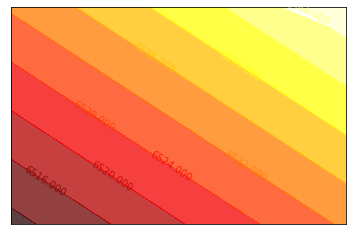

In [4]:
if __name__ == '__main__':
    B1_history, B2_history = np.meshgrid(B1_history, B2_history)
    C = plt.contourf(B1_history,B2_history,get_height(B1_history,B2_history),10,alpha=0.75,cmap=plt.cm.hot, linewidth=.5)
#     C = plt.contour(B1_history,B2_history,get_height(B1_history,B2_history),10,colors='black',linewidth=.5)
    plt.clabel(C,inline=True,fontsize=10)
    plt.xticks(())
    plt.yticks(())
    plt.show()

# Q2
<img src="./picture_source/HW_3_2.PNG">

# Answer

Epoch: 0
57 83 94
Epoch: 1
56 82 94
Epoch: 2
55 81 95
Epoch: 3
54 80 95
Epoch: 4
53 79 96
Epoch: 5
52 78 96
Epoch: 6
51 77 96
Epoch: 7
50 76 96
Epoch: 8
49 75 96
Epoch: 9
48 74 96
Epoch: 10
47 73 96
Epoch: 11
46 72 97
Epoch: 12
45 71 100
Epoch: 13
44 70 105
Epoch: 14
43 69 106
Epoch: 15
42 68 111
Epoch: 16
41 67 115
Epoch: 17
40 66 120
Epoch: 18
39 65 124
Epoch: 19
38 64 128
Epoch: 20
37 63 131
Epoch: 21
36 62 134
Epoch: 22
35 61 134
Epoch: 23
34 60 135
Epoch: 24
33 59 138
Epoch: 25
32 58 140
Epoch: 26
31 57 141
Epoch: 27
30 56 144
Epoch: 28
29 55 147
Epoch: 29
28 54 152
Epoch: 30
27 53 155
Epoch: 31
26 52 158
Epoch: 32
25 51 161
Epoch: 33
24 50 168
Epoch: 34
23 49 170
Epoch: 35
23 48 170
                   Second Phase Regression!!!!!!!
Epoch: 36
22 46 167
                   Second Phase Regression!!!!!!!
                   Random Walk!!!!!!!
Epoch: 37
21 47 164
                   Second Phase Regression!!!!!!!
                   Random Walk!!!!!!!
                   Random Walk!!!!!!

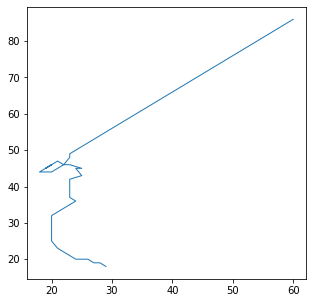

In [5]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


def create_data(x, y, raw_data):
    # 取得周遭(25宮格)24格的值+自己的值
    # 中間為(X0)；剩餘格子自左上開始起算順時鐘分別為：X1~X24
    value_list = [int(raw_data.iloc[x, y])]
    y_list = [(y - 2), (y - 1), y, (y + 1), (y + 2), (y - 2), (y - 1), y, (y + 1), (y + 2), (y - 2),
              (y - 1),
              (y + 1), (y + 2), (y - 2), (y - 1), y, (y + 1), (y + 2), (y - 2), (y - 1), y, (y + 1),
              (y + 2)]
    x_list = [(x - 2), (x - 2), (x - 2), (x - 2), (x - 2), (x - 1), (x - 1), (x - 1), (x - 1), (x - 1), x,
              x, x, x,
              (x + 1), (x + 1), (x + 1), (x + 1), (x + 1), (x + 2), (x + 2), (x + 2), (x + 2), (x + 2)]
    # 開始建立資料
    for i, j in enumerate(y_list):
        if 0 <= y_list[i] <= (raw_data.shape[1] - 1):
            if 0 <= x_list[i] <= (raw_data.shape[0] - 1):
                # 邊界內填上原值
                value_list.append(int(raw_data.iloc[x_list[i], y_list[i]]))
            else:
                # 超出邊界填上0
                value_list.append(int(0))
        else:
            # 超出邊界填上0
            value_list.append(int(0))
    value_array = np.array([value_list])
    return value_array, value_list


def create_y_value(training_data):
    # 開始計算 x_movement, y_movement 值
    for i in range(len(training_data)):
        row_max = int(training_data.iloc[i, :].max())
        # create x-movement value
        if int(training_data.iloc[i, 1]) == row_max or int(training_data.iloc[i, 2]) == row_max \
                or int(training_data.iloc[i, 3]) == row_max \
                or int(training_data.iloc[i, 4]) == row_max or int(training_data.iloc[i, 5]) == row_max:
            training_data.loc[i, 'x_movement'] = -2
        elif int(training_data.iloc[i, 6]) == row_max or int(training_data.iloc[i, 7]) == row_max \
                or int(training_data.iloc[i, 8]) == row_max \
                or int(training_data.iloc[i, 9]) == row_max or int(training_data.iloc[i, 10]) == row_max:
            training_data.loc[i, 'x_movement'] = -1
        elif int(training_data.iloc[i, 11]) == row_max or int(training_data.iloc[i, 12]) == row_max \
                or int(training_data.iloc[i, 0]) == row_max \
                or int(training_data.iloc[i, 13]) == row_max or int(training_data.iloc[i, 14]) == row_max:
            training_data.loc[i, 'x_movement'] = 0
        elif int(training_data.iloc[i, 15]) == row_max or int(training_data.iloc[i, 16]) == row_max \
                or int(training_data.iloc[i, 17]) == row_max \
                or int(training_data.iloc[i, 18]) == row_max or int(training_data.iloc[i, 19]) == row_max:
            training_data.loc[i, 'x_movement'] = 1
        elif int(training_data.iloc[i, 20]) == row_max or int(training_data.iloc[i, 21]) == row_max \
                or int(training_data.iloc[i, 22]) == row_max \
                or int(training_data.iloc[i, 23]) == row_max or int(training_data.iloc[i, 24]) == row_max:
            training_data.loc[i, 'x_movement'] = 1
        # create y-movement value
        if int(training_data.iloc[i, 1]) == row_max or int(training_data.iloc[i, 6]) == row_max \
                or int(training_data.iloc[i, 11]) == row_max \
                or int(training_data.iloc[i, 15]) == row_max or int(training_data.iloc[i, 20]) == row_max:
            training_data.loc[i, 'y_movement'] = -2
        elif int(training_data.iloc[i, 2]) == row_max or int(training_data.iloc[i, 7]) == row_max \
                or int(training_data.iloc[i, 12]) == row_max \
                or int(training_data.iloc[i, 16]) == row_max or int(training_data.iloc[i, 21]) == row_max:
            training_data.loc[i, 'y_movement'] = -1
        elif int(training_data.iloc[i, 3]) == row_max or int(training_data.iloc[i, 8]) == row_max \
                or int(training_data.iloc[i, 0]) == row_max \
                or int(training_data.iloc[i, 17]) == row_max or int(training_data.iloc[i, 22]) == row_max:
            training_data.loc[i, 'y_movement'] = 0
        elif int(training_data.iloc[i, 4]) == row_max or int(training_data.iloc[i, 9]) == row_max \
                or int(training_data.iloc[i, 13]) == row_max \
                or int(training_data.iloc[i, 18]) == row_max or int(training_data.iloc[i, 23]) == row_max:
            training_data.loc[i, 'y_movement'] = 1
        elif int(training_data.iloc[i, 5]) == row_max or int(training_data.iloc[i, 10]) == row_max \
                or int(training_data.iloc[i, 14]) == row_max \
                or int(training_data.iloc[i, 19]) == row_max or int(training_data.iloc[i, 24]) == row_max:
            training_data.loc[i, 'y_movement'] = 2
    return training_data


def data_preprocessing(data_path):
    raw_data = pd.read_csv(data_path, header=None)
    # 準備最後餵進 pandas 的 list
    data_list = []
    for x in range(raw_data.shape[0]):
        for y in range(raw_data.shape[1]):
            value_array, value_list = create_data(x, y, raw_data)
            # Row 資料建立完成，Append 到總資料框上
            data_list.append(value_list)

    training_data = pd.DataFrame(data_list, columns=[('X' + str(i)) for i in range(25)])
    training_data_preprocessed = create_y_value(training_data)
    training_data_preprocessed.to_csv("./data/data_regression_data.csv", sep=',', index=None, header=True)
    return training_data_preprocessed, raw_data


def second_phase_regression(start_x, start_y, raw_data):
    # Create Training Data
    data_point_x = [i for i in range((start_x - 5), (start_x + 6))]
    data_point_y = [i for i in range((start_y - 5), (start_y + 6))]
    data_list = []
    for i, j in enumerate(data_point_x):
        for a, b in enumerate(data_point_y):
            value_array, value_list = create_data(j, b, raw_data)
            data_list.append(value_list)
    second_phase_data = pd.DataFrame(data_list, columns=[('X' + str(i)) for i in range(25)])
    # data preprocessing
    second_phase_data_preprocessed = create_y_value(second_phase_data)
    # split the data to X, and y1, y2 and train regression
    X = second_phase_data_preprocessed.iloc[:, :-2]
    y = second_phase_data_preprocessed.iloc[:, -1]

    reg_y = linear_model.LinearRegression().fit(X, y)
    y = second_phase_data_preprocessed.iloc[:, -2]
    reg_x = linear_model.LinearRegression().fit(X, y)
    # predict the data
    test_array, test_list = create_data(start_x, start_y, raw_data)
    x_movement = int(np.around(reg_x.predict(test_array), decimals=0))
    y_movement = int(np.around(reg_y.predict(test_array), decimals=0))
    return x_movement, y_movement


def climb(data_path, penalty, margin, stop_epoch, memory, start_x, start_y):
    training_data, raw_data = data_preprocessing(data_path)
    # train regression model for y-axis
    X = training_data.iloc[:, :-2]
    y = training_data.iloc[:, -1]
    reg_y = linear_model.LinearRegression().fit(X, y)
    # print('R^2:', reg_y.score(X, y))
    # train regression model for x-axis
    y = training_data.iloc[:, -2]
    reg_x = linear_model.LinearRegression().fit(X, y)
    # print('R^2:', reg_x.score(X, y))

    # start climbing ==============
    epoch = 0
    x_history = []
    y_history = []
    x_memory = []
    y_memory = []
    while True:
        x_history.append(int(start_x))
        y_history.append(int(start_y))
        x_memory.append(int(start_x))
        y_memory.append(int(start_y))

        # 準備 Model 所需資料
        test_array, test_list = create_data(start_x, start_y, raw_data)

        # Model 預測 X,Y 移動值
        x_movement = int(np.around(reg_x.predict(test_array), decimals=0))
        y_movement = int(np.around(reg_y.predict(test_array), decimals=0))

        # 檢查新邊界
        # 新 x, y 都超出邊界
        if not 0 <= (start_y + y_movement) <= (raw_data.shape[1] - 1) \
                and not 0 <= (start_x + x_movement) <= (raw_data.shape[0] - 1):
            # 給予 y 相反象限的隨機值
            if y_movement < 0:
                candidate_list = [0, 1, 2]
                y_movement = candidate_list[random.randint(0, 2)]
            elif y_movement > 0:
                candidate_list = [0, -1, -2]
                y_movement = candidate_list[random.randint(0, 2)]
            # 給予 x 相反象限的隨機值
            if x_movement < 0:
                candidate_list = [0, 1, 2]
                x_movement = candidate_list[random.randint(0, 2)]
            elif x_movement > 0:
                candidate_list = [0, -1, -2]
                x_movement = candidate_list[random.randint(0, 2)]
        else:
            # x, y 都在邊界內；或只有其中一個超出邊界
            # 測試新y是否超出界線
            if 0 <= (start_y + y_movement) <= (raw_data.shape[1] - 1):
                pass
            else:
                # 減少移動直到不會超出邊界
                if y_movement < 0:
                    while not 0 <= (start_y + y_movement) <= (raw_data.shape[1] - 1):
                        y_movement += 1
                elif y_movement > 0:
                    while not 0 <= (start_y + y_movement) <= (raw_data.shape[1] - 1):
                        y_movement -= 1
            # 測試新x是否超出界線
            if 0 <= (start_x + x_movement) <= (raw_data.shape[0] - 1):
                pass
            else:
                # 減少移動直到不會超出邊界
                if x_movement < 0:
                    while not 0 <= (start_x + x_movement) <= (raw_data.shape[0] - 1):
                        x_movement += 1
                elif x_movement > 0:
                    while not 0 <= (start_x + x_movement) <= (raw_data.shape[0] - 1):
                        x_movement -= 1

        # 檢查是否回到原本的點
        if int(start_x + x_movement) in x_memory and int(start_y + y_movement) in y_memory:

            # 進行第二階段回歸
            print('                   Second Phase Regression!!!!!!!')
            x_movement, y_movement = second_phase_regression(start_x, start_y, raw_data)

            # 如果還是一樣
            if int(start_x + x_movement) in x_memory and int(start_y + y_movement) in y_memory:
                # 重新隨機賦予新值
                random_walk = [i for i in range(-2, 3)]
                find_epoch = 0
                while int(start_x + x_movement) in x_memory and int(start_y + y_movement) in y_memory:
                    # 重新嘗試限制
                    find_epoch += 1
                    if find_epoch == 30:
                        x_memory = []
                        y_memory = []
                        print('                   Random Walk (With Penalty)!!!!!!!')
                    if start_x <= margin or (raw_data.shape[0] - start_x) <= margin or start_y <= margin \
                            or (raw_data.shape[1] - start_y) <= margin:
                        print('                   Memory abandoned!!!!!!!')
                        x_movement = penalty * random_walk[random.randint(0, len(random_walk) - 1)]
                        y_movement = penalty * random_walk[random.randint(0, len(random_walk) - 1)]
                        # 確認新點會在邊界內
                        while not 0 <= (start_y + y_movement) <= (raw_data.shape[1] - 1) \
                                or not 0 <= (start_x + x_movement) <= (raw_data.shape[0] - 1):
                            x_movement = penalty * random_walk[random.randint(0, len(random_walk) - 1)]
                            y_movement = penalty * random_walk[random.randint(0, len(random_walk) - 1)]
                    else:
                        print('                   Random Walk!!!!!!!')
                        x_movement = random_walk[random.randint(0, len(random_walk) - 1)]
                        y_movement = random_walk[random.randint(0, len(random_walk) - 1)]
                        # 確認新點會在邊界內
                        while not 0 <= (start_y + y_movement) <= (raw_data.shape[1] - 1) \
                                or not 0 <= (start_x + x_movement) <= (raw_data.shape[0] - 1):
                            x_movement = random_walk[random.randint(0, len(random_walk) - 1)]
                            y_movement = random_walk[random.randint(0, len(random_walk) - 1)]

        # 給予新值
        start_x += x_movement
        start_y += y_movement

        # reset 歷史紀錄
        if epoch % memory == 0:
            x_memory = []
            y_memory = []

        # 檢查是否已經抵達山頂
        Volcano_max = int(np.max(raw_data.max()))
        new_value = int(raw_data.iloc[start_x, start_y])
        if float(new_value) == float(Volcano_max):
            print('We have reached the peak!')
            print(start_x, start_y, int(raw_data.iloc[start_x, start_y]))
            break

        # 最多走多少步
        if epoch == stop_epoch:
            break
        # 增加 epoch
        print('Epoch:', epoch)
        print(start_x, start_y, int(raw_data.iloc[start_x, start_y]))
        epoch += 1
    return x_history, y_history


if __name__ == '__main__':
    x_history, y_history = climb("./data/Volcano.csv",
          penalty=5, margin=10, stop_epoch=3000, memory=20, start_x=60, start_y=86)
#     print(x_history, '\n', y_history)
    plt.figure(figsize=(5, 5))
    plt.plot(x_history, y_history, linewidth=1)
#     img = plt.imread('./data/Volcano.PNG')
#     plt.imshow(img)
    plt.show()

# Q3
<img src="./picture_source/HW_3_3.PNG">

## Answer

### (a)
### 如程式碼所示。

### (b)
### 我使用 Scikit-learn 的 linear_model 套件進行分析，最終得到的R^2為1.0，Accuracy同樣為1.0。

### (c)
### 如下方程式碼所output的。

In [14]:
import cv2
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import confusion_matrix


# (c) Stepwise regression
def forward_regression(X, y,
                       threshold_in,
                       verbose):
    print('Forward Selection')
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        if not changed:
            break
    return included

def backward_regression(X, y,
                           threshold_out,
                           verbose=False):
    print('Backward Selection')
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [15]:
if __name__ == '__main__':
    # (a)
    # Data Preparation
    female_list = ['./data/ORL_Faces_Classified/0/' + j for i, j in
                   enumerate(os.listdir('./data/ORL_Faces_Classified/0/'))]
    male_list = ['./data/ORL_Faces_Classified/1/' + j for i, j in
                 enumerate(os.listdir('./data/ORL_Faces_Classified/1/'))]
    data_list = []
    # female image
    for index, file in enumerate(female_list):
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE).tolist()
        value_list = []
        for list_index, list_object in enumerate(image):
            for element_index, list_element in enumerate(list_object):
                value_list.append(list_element)
        value_list.append('0')
        data_list.append(value_list)
    # male image
    for index, file in enumerate(male_list):
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE).tolist()
        value_list = []
        for list_index, list_object in enumerate(image):
            for element_index, list_element in enumerate(list_object):
                value_list.append(list_element)
        value_list.append('1')
        data_list.append(value_list)
        # create dataframe
    columns = [('pixel_' + str(i + 1)) for i in range(2576)] + ['output']
    ORL_data = pd.DataFrame(data_list, columns=columns)
    print(ORL_data.shape)
    ORL_data.to_csv("./data/ORL_data.csv", sep=',', index=None, header=True)
    # (b)
    X = ORL_data.iloc[:, :-1]
    y = ORL_data.iloc[:, -1]
    reg = linear_model.LinearRegression().fit(X, y)
    print('R^2:', reg_y.score(X, y))
    # predict the value and build up a confusion matrix
    predict_list = reg.predict(X).tolist()
    answer_list = []
    for i, j in enumerate(predict_list):
        if j < 0.5:
            answer_list.append('0')
        else:
            answer_list.append('1')
    corect_list = [i for i in range(len(answer_list)) if answer_list[i]  == y.tolist()[i]]
    print(confusion_matrix(y.tolist(), answer_list))
    print('Accuracy:', len(corect_list)/len(answer_list))

(400, 2577)
R^2: 1.0
[[ 50   0]
 [  0 350]]
Accuracy: 1.0


In [16]:
if __name__ == '__main__':
    # (c)
    data = pd.read_csv('./data/ORL_data.csv')
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    # perform stepwise regression (with forward selection)
    included_list = forward_regression(X, y, 0.01, True)
    # perform stepwise regression (with backward selection)
    X = pd.DataFrame(X[[j for i, j in enumerate(included_list)]])
    included_list = backward_regression(X, y, 0.01, True)
    print(included_list)
    print('Length:', len(included_list))

Forward Selection


C:\Users\ricardo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  pixel_1470                     with p-value 3.91841e-14
Add  pixel_2488                     with p-value 3.38413e-16
Add  pixel_2271                     with p-value 6.02768e-11
Add  pixel_1722                     with p-value 7.004e-08
Add  pixel_555                      with p-value 1.31884e-07
Add  pixel_1474                     with p-value 5.65748e-06
Add  pixel_1386                     with p-value 8.20976e-06
Add  pixel_1476                     with p-value 6.706e-07
Add  pixel_1051                     with p-value 6.99533e-06
Add  pixel_1561                     with p-value 1.92879e-05
Add  pixel_202                      with p-value 1.4955e-05
Add  pixel_133                      with p-value 1.23609e-05
Add  pixel_186                      with p-value 6.96418e-12
Add  pixel_1687                     with p-value 3.21537e-06
Add  pixel_319                      with p-value 3.01682e-06
Add  pixel_2393                     with p-value 7.13528e-05
Add  pixel_1984              

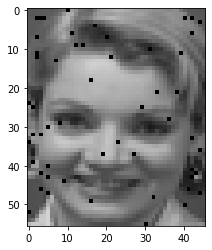

In [8]:
if __name__ == '__main__':
    pixel_list_number = []
    pixel_list_x = []
    pixel_list_y = []
    # transform back to pixel
    for i, j in enumerate(included_list):
        value = int(j[6:])
        row = value / 46 + 1
        column = value % 46
        pixel_list_number.append(value)
        pixel_list_x.append(row)
        pixel_list_y.append(column)
        file = "./data/ORL_Faces_Classified/0/1_1.png"
        sample = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        for i, j in enumerate(pixel_list_x):
            x_value = int(j - 1)
            y_value = int(pixel_list_y[i] - 1)
            sample[x_value, y_value] = 0
    # cv2.imwrite( "./sample.png", sample)
    imgplot = plt.imshow(sample, cmap='gray', vmin=0, vmax=255)
    plt.show()